In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
mydata=pd.read_csv('/content/Life Expectancy Data.csv')

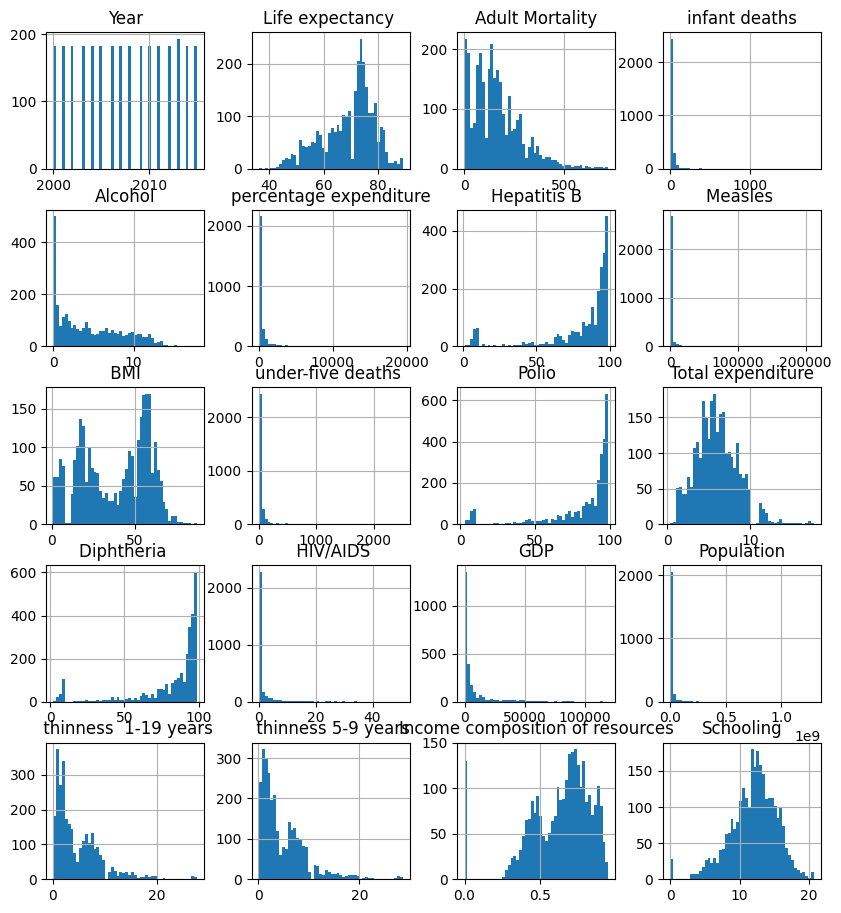

In [32]:
mydata.hist(bins=50, figsize=(10,11))
plt.show()

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

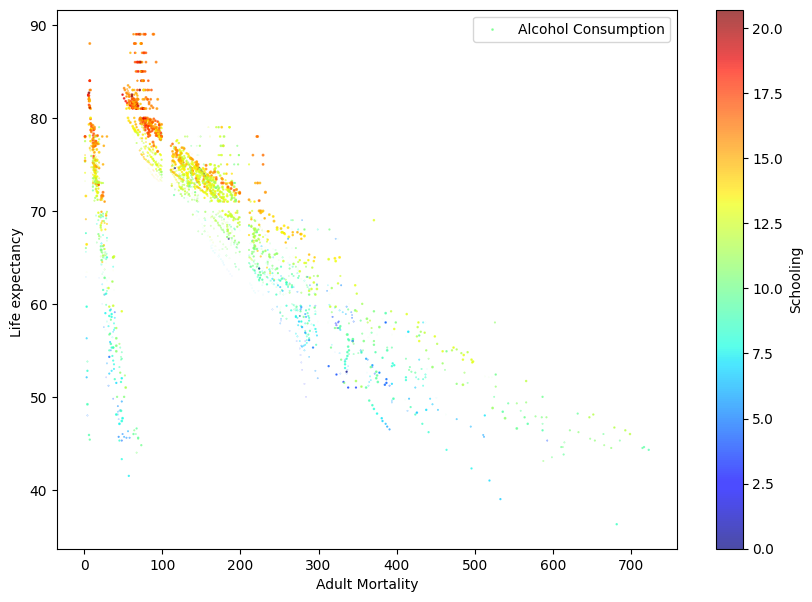

In [33]:
mydata.plot(kind="scatter",
                         x="Adult Mortality",  # Replace with a relevant column
                         y="Life expectancy ", # Replace with a relevant column
                         c="Schooling",        # Replace with a column for color-coding
                         cmap="jet",
                         colorbar=True,
                         legend=True,
                         sharex=False,
                         figsize=(10, 7),
                         s=mydata['Alcohol']/10,  # Replace with a relevant column for size and adjust scaling
                         label="Alcohol Consumption", # Replace with a label for size
                         alpha=0.7)

In [34]:
mydata.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [35]:
mydata.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [39]:
x = mydata[["Adult Mortality"]]
y = mydata['Life expectancy ']

In [41]:
# Drop rows with missing values in 'Adult Mortality' and keep the original index
x_train_df = pd.DataFrame(x_train, index=y_train.index)  # Use y_train's index
x_train_df = x_train_df.dropna()
x_train = x_train_df.values

# Update y_train to match x_train's index (using the DataFrame's index)
y_train = y_train[x_train_df.index]

# Now you can fit the model
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
r2_score(y_test,y_pred)

0.7458164255133626

In [46]:
print(lr.intercept_)

115651.7205


In [47]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [48]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [49]:
x[0:5]

,Adult Mortality
0,263.0
1,271.0
2,268.0
3,272.0
4,275.0


In [53]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127537.681704
39   81005.76   89637.760910
30   99937.59  103290.625994
45   64926.08   52492.691362
17  125370.37  126845.597128


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder for categorical encoding
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler #For feature scaling

In [58]:
print("Missing Values:")
print(mydata.isnull().sum())

Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [59]:
x = mydata.drop(['Life expectancy '], axis=1)  # Add a space after 'expectancy'
y = mydata['Life expectancy ']

In [60]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2938, 21)
Shape of y: (2938,)


In [61]:
x = x.values
y = y.values


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
print("Shape of x:", x_train.shape)
print("Shape of y:", y_train.shape)

Shape of x: (2350, 21)
Shape of y: (2350,)


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'mydata' is your DataFrame

# 1. Filling with mean for numerical features:
numerical_cols = mydata.select_dtypes(include=np.number).columns.tolist()
numerical_imputer = SimpleImputer(strategy='mean')
mydata[numerical_cols] = numerical_imputer.fit_transform(mydata[numerical_cols])

# 2. Filling with most frequent value for categorical features:
categorical_cols = mydata.select_dtypes(include=['object']).columns.tolist()
categorical_imputer = SimpleImputer(strategy='most_frequent')
mydata[categorical_cols] = categorical_imputer.fit_transform(mydata[categorical_cols])

In [69]:
mydata_cleaned=mydata

In [77]:
# Assuming 'Country' was already processed and columns like 'Country_Afghanistan', 'Country_Albania' etc. exist
# If not and 'Country' exists in your original data, skip this step and move to the next one

# Get a list of columns that start with 'Country_'
country_columns = [col for col in mydata.columns if col.startswith('Country_')]

# Use these columns for dummy encoding if they exist
if country_columns:
    mydata = pd.get_dummies(mydata, columns=country_columns, drop_first=True)
else:
    # If 'Country' column still exists and wasn't processed before, use this
    mydata = pd.get_dummies(mydata, columns=['Country'], drop_first=True)

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ... (your previous code for data loading and cleaning) ...

# Separate features (x) and target (y)
x = mydata.drop(columns=['Life expectancy '])  # Assuming 'Life expectancy ' is your target variable
y = mydata['Life expectancy ']

# One-hot encoding for 'Status' column
x = pd.get_dummies(x, columns=['Status'], drop_first=True)  # Add this line

# If 'Country' is still a column in your DataFrame, proceed with one-hot encoding
# ... (your existing code for one-hot encoding 'Country') ...

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(x_train, y_train)

# Make predictions on the test set
y_pred_multiple = model_multiple.predict(x_test)

# Evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 3.4358
  R² Score: 0.9603


In [89]:
print(model_multiple.intercept_)

-455.6359485409505


In [90]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [92]:
model_multiple.predict(x[0:5])

array([60.60234402, 60.49900415, 60.20992096, 59.95733639, 59.61768009])

In [93]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

      Actual  Predicted
2546    73.7  70.414632
650     75.9  75.782468
1740    74.2  74.665038
177     76.8  77.426421
1377    51.9  51.449551
